In [0]:
# fit/train -> predict/test

## Train

In [0]:
# Feature(X) - Pclass, Sex, Fare, ... - 여러 개
# Lable(y) - Survived - 하나

In [0]:
import pandas as pd
train = pd.read_csv("/content/train.csv")

feature_names = ["Pclass"]
feature_names

X = train[feature_names]
X.head()

,Pclass
0,3
1,1
2,3
3,1
4,3


In [0]:
label_name = "Survived"

y = train[label_name]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Decision Tree

In [0]:
# scikit-learn == sklearn
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualize

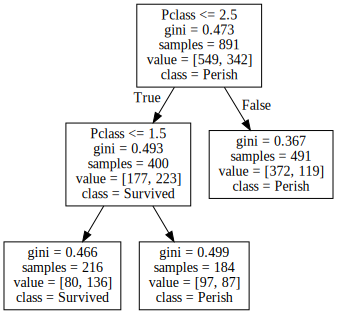

In [0]:
import graphviz
from sklearn.tree import export_graphviz

tree = export_graphviz(model,
                       feature_names = feature_names,
                       class_names = ["Perish", "Survived"])

graphviz.Source(tree)

## Predict

In [0]:
test = pd.read_csv("/content/test.csv")

X_test = test[feature_names]

prediction_list = model.predict(X_test)
prediction_list[0:5]

array([0, 0, 0, 0, 0])

# Submit

In [0]:
submit = pd.read_csv("/content/gender_submission.csv")

submit

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
submit["Survived"] = prediction_list

submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [0]:
submit.to_csv("decision-tree.csv", index = False)